## Problem Statement

https://fivethirtyeight.com/features/the-fifth-battle-for-riddler-nation/

In a distant, war-torn land, there are 13 castles. There are two warlords: you and your archenemy. Each castle has its own strategic value for a would-be conqueror. Specifically, the castles are worth 1, 2, 3, …, 12, and 13 victory points. You and your enemy each have 100 soldiers to distribute, any way you like, to fight at any of the 13 castles. Whoever sends more soldiers to a given castle conquers that castle and wins its victory points. If you each send the same number of troops, you split the points. You don’t know what distribution of forces your enemy has chosen until the battles begin. Whoever wins the most points wins the war.

Submit a plan distributing your 100 soldiers among the 13 castles. Once we receive all your battle plans, we’ll adjudicate all the possible one-on-one matchups. Whoever wins the most wars wins the battle royale and is crowned ruler of Riddler Nation!

## Total Victory Points

In [2]:
14*6+7

91

46 points to win

In [6]:
from itertools import product
import numpy as np

## Total number of Deployments

* How many ways can you split 100 soldiers across 13 castles?

References: 
* https://www.statlect.com/mathematical-tools/partitions
* https://stackoverflow.com/questions/39192777/how-to-split-a-list-into-n-groups-in-all-possible-combinations-of-group-length-a

## Stochastic Approach

/home/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


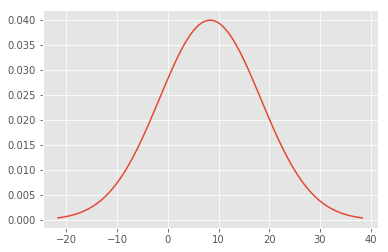

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import seaborn as sns
plt.style.use('ggplot')
# sns.set_style('darkgrid')
%matplotlib inline

mu = 100/12
# variance = 30
sigma = 10
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()

In [73]:
#Choose a [random] number between 0 and 100. This will be the number of soldiers sent to castle 1. 
#Choose a number between 0 and the remaining soldiers available. This will be the number of soldiers sent to castle 2.
#Continue this process through castle 13.

#This set constitutes a battle plan.

#Helper function for generating deployments more strategically
def generate_squad(soldiers, castles_remaining):
    while True:
        to_deploy = round(np.random.normal(loc= soldiers/castles_remaining , scale=10), 0)
        if (to_deploy >= 0) and (to_deploy <= soldiers):
            return to_deploy
def generate_bp():
    bp = []
    soldiers = 100
    for i in range(12):
        #to_deploy = np.random.randint(low=0, high=soldiers+1)
        castles_remaining = 13 - i
        to_deploy = generate_squad(soldiers, castles_remaining)
        soldiers -= to_deploy
        bp.append(to_deploy)
    #Deploy remaining soldiers to castle 13
    bp.append(soldiers)
    #Reverse order to make a more compelling bp on average
    #Statistically this will generally generate terrible battle plans as most soldiers are apt to be deployed to low castles. Thus, order reversed.
    bp = tuple(bp[-1::-1])
    assert(sum(bp)==100)
    return bp

In [74]:
generate_bp()

(2.0, 1.0, 2.0, 27.0, 2.0, 18.0, 14.0, 4.0, 3.0, 12.0, 7.0, 4.0, 4.0)

### Additional Terminology Defined

* commanders_book - a set of battle plans
* matchup - a tuple of 2 battle plans to face off

## Scoring

In [107]:
def score(bp1, bp2):
    #Initialize scores
    score1 = score2 = 0
    for castle, (s1, s2) in enumerate(list(zip(bp1,bp2))):
        if s1 > s2:
            score1 += castle+1
        elif s2 > s1:
            score2 += castle+1
        else:
            score1 += (castle+1)/2
            score2 += (castle+1)/2
    if score1 > score2:
        return (1, score1)
    elif score2 > score1:
        return (2, score2)
    else:
        return ("Draw", score1)

#Simple enough to negate
# def matchups(cb1, cb2):
#     return product(cb1, cb2)

def simulate_winner(cb1, cb2):
    score1, score2, draws = 0
    for matchup in product(cb1, cb2):
        result = score(matchup[0], matchup[1])
        if result == 1:
            score1 += 1
        elif result ==2:
            score2 += 1
        else:
            draws +=1   
    if score1 > score2:
        return (1, score1)
    elif score2 > score1:
        return (2, score2)
    else:
        return ("Draw", scor1)

In [71]:
import datetime

In [81]:
start = datetime.datetime.now()

# all_plans = set()
start_len = len(all_plans)
n_to_generate = 10**5
for i in range(n_to_generate):
    new_bp = generate_bp()
    if new_bp not in all_plans:
        all_plans.add(new_bp)
number_new_plans = len(all_plans) - start_len
print(len(all_plans), " total unique plans.")
print("Of those generated, ",100*number_new_plans/n_to_generate, "% were new and unique")

end = datetime.datetime.now()
elapsed = end - start
print("Process took:", elapsed)

299999  total unique plans.
Of those generated,  99.999 % were new and unique
Process took: 0:00:08.233834


## Comments

Takes about 8-9 seconds to generate 10,000 battle plans. Clearly the number of possible plans is vast.

## Next Steps:

* Rate/ weight battle plans?
    * How? Against each other solely? Standard/human conceived strategies?
    * Human strategy thought 1:
        * How do I get 46 points, and 

## Simulate a battle!

In [119]:
start = datetime.datetime.now()

idxs = np.random.choice(len(all_plans), size=2)
bp1 = list(all_plans)[idxs[0]]
bp2 = list(all_plans)[idxs[1]]
print(bp1,'\n', bp2)
print(score(bp1,bp2))

end = datetime.datetime.now()
elapsed = end - start
print("Process took:", elapsed)

(0.0, 6.0, 2.0, 10.0, 12.0, 0.0, 4.0, 12.0, 4.0, 22.0, 21.0, -0.0, 7.0) 
 (1.0, -0.0, 8.0, 11.0, 2.0, 9.0, 15.0, 13.0, 13.0, 14.0, 2.0, 12.0, 0.0)
(2, 50)
Process took: 0:00:00.036895


## Iterate and Score the BPs

## 